In [2]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas_profiling
sns.set()

c:\Users\Usuario\Desktop\Movies project\movies-project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5504\2145818308.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
df_movies = pd.read_csv("movies_dataset_limpio.csv")
df_credits = pd.read_csv("credits_limpio.csv")
pd.set_option('display.max_columns', None)
df = pd.merge(df_movies, df_credits, on="id")
df['ganancia'] = df['revenue'] - df['budget']
df.drop_duplicates(inplace=True)

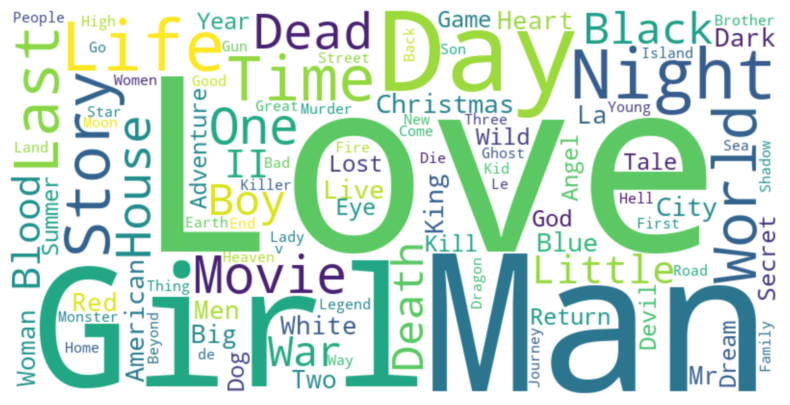

In [4]:
# Creo una nube de palabras con los nombres de las películas
titles_conc = ' '.join(df['title'])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(titles_conc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()


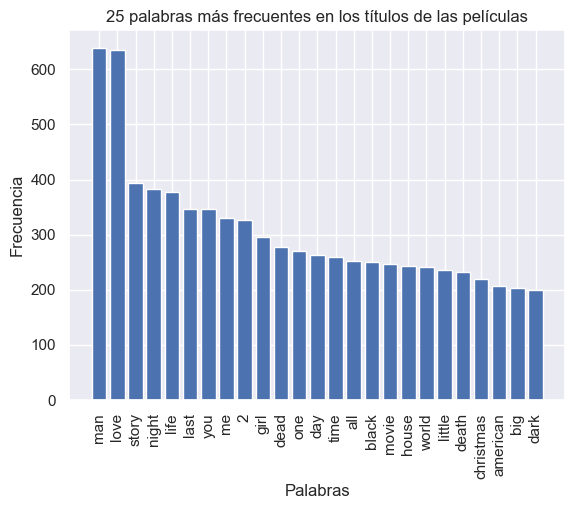

Palabra: man	Frecuencia: 639
Palabra: love	Frecuencia: 635
Palabra: story	Frecuencia: 393
Palabra: night	Frecuencia: 382
Palabra: life	Frecuencia: 377
Palabra: last	Frecuencia: 346
Palabra: you	Frecuencia: 346
Palabra: me	Frecuencia: 330
Palabra: 2	Frecuencia: 327
Palabra: girl	Frecuencia: 296
Palabra: dead	Frecuencia: 278
Palabra: one	Frecuencia: 270
Palabra: day	Frecuencia: 263
Palabra: time	Frecuencia: 260
Palabra: all	Frecuencia: 253
Palabra: black	Frecuencia: 250
Palabra: movie	Frecuencia: 246
Palabra: house	Frecuencia: 243
Palabra: world	Frecuencia: 242
Palabra: little	Frecuencia: 236
Palabra: death	Frecuencia: 233
Palabra: christmas	Frecuencia: 220
Palabra: american	Frecuencia: 207
Palabra: big	Frecuencia: 203
Palabra: dark	Frecuencia: 200


In [5]:
# Gráfico de barras y lista con las 25 palabras que más se repiten
titles_conc = titles_conc.lower()
palabras = titles_conc.split()

# Excluir ciertas palabras
palabras_a_excluir = ['the', 'of', 'a', 'in', 'and', 'to', 'for', 'on', 'my', 'i', '&', 'from', 'is', 'with', 'at', '-']

# Calcular la frecuencia de cada palabra
frecuencia = {}
for palabra in palabras:
    if palabra not in palabras_a_excluir:
        if palabra in frecuencia:
            frecuencia[palabra] += 1
        else:
            frecuencia[palabra] = 1

# Obtener las 15 palabras más frecuentes y sus frecuencias
palabras_top = sorted(frecuencia.items(), key=lambda x: x[1], reverse=True)[:25]

# Crear una lista de palabras y frecuencias
lista_palabras = [palabra[0] for palabra in palabras_top]
lista_frecuencias = [palabra[1] for palabra in palabras_top]

# Crear un gráfico de barras
plt.bar(range(len(lista_palabras)), lista_frecuencias)
plt.xticks(range(len(lista_palabras)), lista_palabras, rotation='vertical')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('25 palabras más frecuentes en los títulos de las películas')
plt.show()

# Mostrar la lista de palabras y frecuencias
for palabra, frecuencia in palabras_top:
    print(f'Palabra: {palabra}\tFrecuencia: {frecuencia}')

In [43]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file("report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


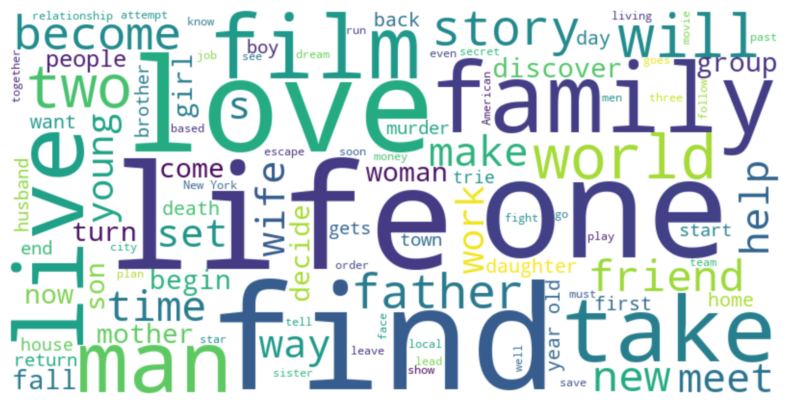

In [11]:
df['overview'] = df['overview'].fillna('').astype(str)
overview_conc = ' '.join(df['overview'])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(overview_conc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()


In [14]:
columnas_numericas = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'return', 'ganancia']
df[columnas_numericas].describe()


,budget,revenue,popularity,runtime,vote_average,vote_count,return,ganancia
count,4.542600e+04,4.542600e+04,45426.000000,45171.000000,45426.000000,45426.000000,4.542600e+04,4.542600e+04
mean,4.227998e+06,1.121770e+07,2.922540,94.135065,5.619225,109.962554,6.593163e+02,6.989699e+06
std,1.743081e+07,6.435559e+07,6.006991,38.377211,1.922759,491.485877,7.465218e+04,5.216042e+07
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.657101e+08
25%,0.000000e+00,0.000000e+00,0.386460,85.000000,5.000000,3.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.128248,95.000000,6.000000,10.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,3.681131,107.000000,6.800000,34.000000,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09,547.488298,1256.000000,10.000000,14075.000000,1.239638e+07,2.550965e+09


Outliers en la columna 'budget': 8889
Outliers en la columna 'revenue': 7405
Outliers en la columna 'popularity': 4231
Outliers en la columna 'runtime': 5409
Outliers en la columna 'vote_average': 3592
Outliers en la columna 'vote_count': 6886
Outliers en la columna 'return': 5381
Outliers en la columna 'ganancia': 10893


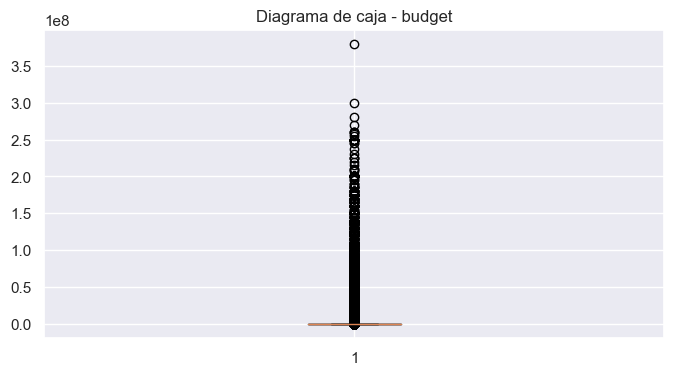

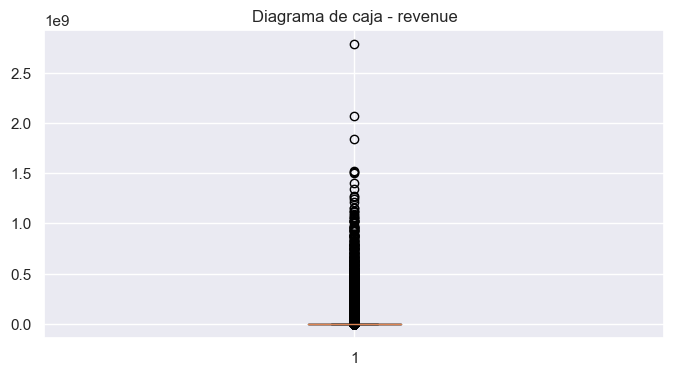

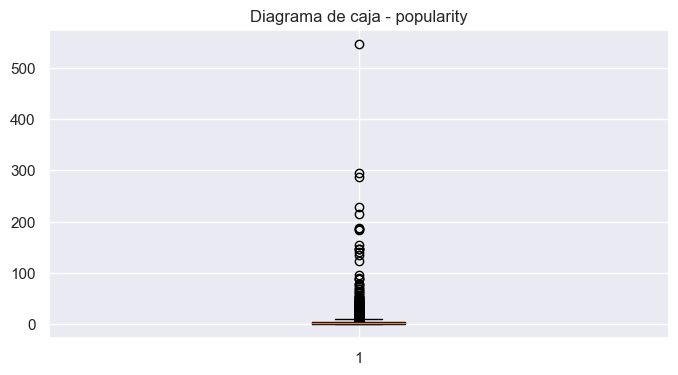

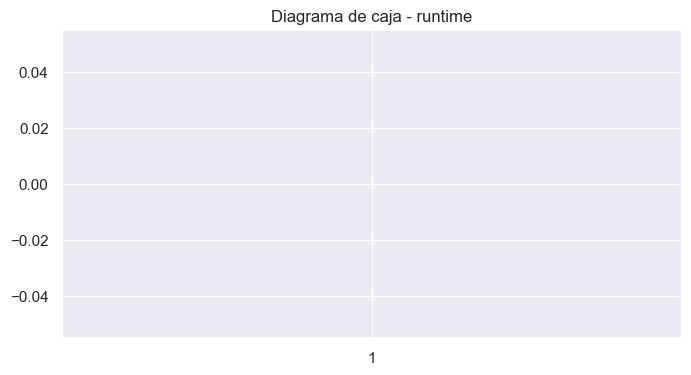

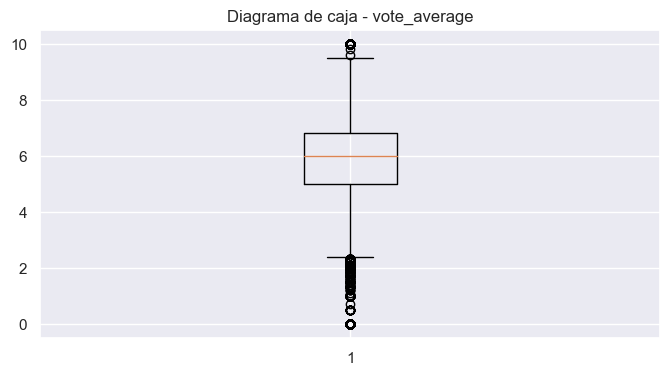

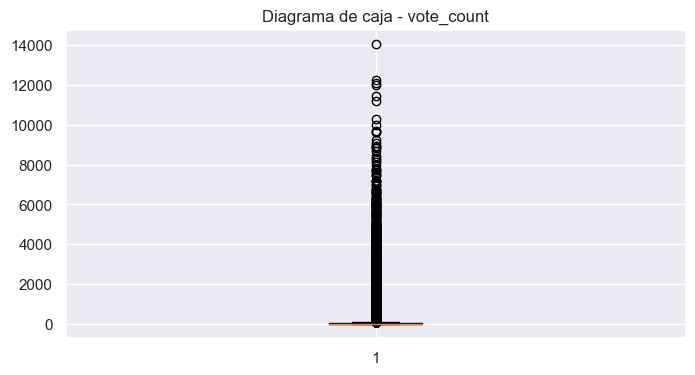

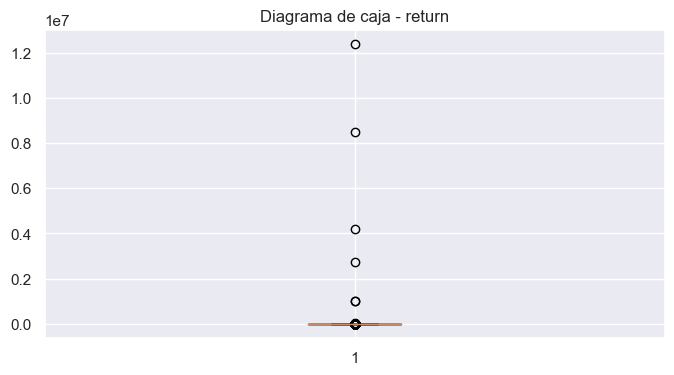

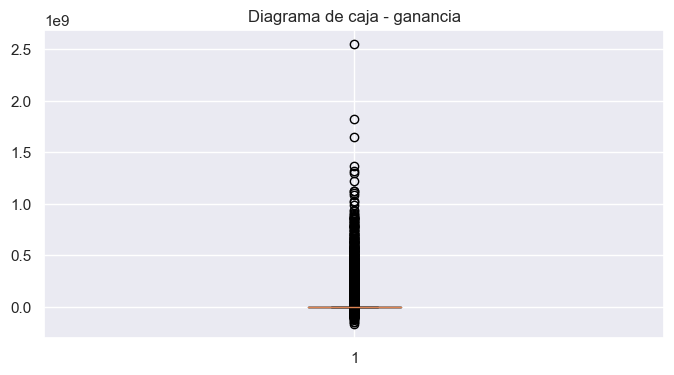

In [23]:
# Detección de outliers utilizando el rango intercuartílico
for columna in columnas_numericas:
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Outliers en la columna '{columna}': {outliers.shape[0]}")

# Visualización de outliers utilizando diagramas de caja (box plots)
for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[columna])
    plt.title(f'Diagrama de caja - {columna}')
    plt.show()
